# Preparing Data for Machine Learning: Feature Selection, Feature Engineering, and Dimensionality Reduction

These methods are used to extract patterns from data, and sometimes predict future events. The data that goes into the algorithms are called features, and we can modify our set of features using feature engineering, feature selection, and dimensionality reduction. We can often improve our ML models dramatically with these methods that we cover here.

## Types of Machine Learning

- Supervised Learning (Classification and Regression)
- Unsupervised Learning 
- Reinforcement Learning

Supervised learning is where we take features and predict a target. In other words, we take inputs and predict an expected output. An example of this is classifying if someone will default on a loan (fail to pay a loan back). For example, we might have someone's credit score, yearly income, age, and job title, and could use that to predict the probability that they default on their loan. Our inputs, or features, would be the credit score, income, age, and job title, and the target (which we could call the output or label) would be if someone will default on their loan.

Within supervised learning, there are two subgroups – classification and regression. Classification is where our outputs are categorical. This can be binary classification, as with the loan default example. In that case, our outputs are default/no default, which can also be represented as 1 and 0 for default and no default. We can have multi-class classification as well, where we have several classes we are trying to predict. For example, we could classify the breed of a dog based on an image. The targets for multi-class classification can also apply to a single data point. For example, we could be predicting which objects are present in an image; this would be a multi-label, multi-class classification, where each data point could have multiple labels or targets. Most of the time, we will have binary classification or multi-class classification where each target has one label. We will learn more about classification in Chapter 11, Machine Learning for Classification.

The other subgroup of supervised learning is regression. This is where we are predicting a continuous numeric value, like the temperature outside. Each data point has input features and a single target. We will learn more about regression in Chapter 13, Machine Learning with Regression.

Unsupervised learning is used to extract patterns out of data without using a target variable. Most of these techniques include clustering, where we see how data groups together. Some of the dimensionality reduction techniques we will discuss at the end of the chapter can be used for unsupervised learning as well. 

There is one other class of ML algorithms that combines unsupervised and supervised learning: semi-supervised learning. This utilizes a combination of labeled and unlabeled data to make target predictions for a dataset

## Feature Selection

When we are using features to predict a target, some of the features will be more important than others. For example, if we are predicting whether someone will default on a loan, their credit score will be a much better predictor of default than their height and weight. While we can use a large number of features as inputs to ML models, it's much better to minimize the number of features we're using with feature selection methods. ML algorithms take computational power and time to run, and the simpler and more effective we can make the input features, the better. With feature selection, we can screen our inputs for those that have the most promise. These features should have some relationship to the target variable so that we can predict the target with the features. Then we can throw out variables that aren't going to help predict the target.

### The Curse of Dimensionality

Feature selection is related to a concept called "the curse of dimensionality." This idea is that as our number of dimensions (features) increases, a few things happen:

- The volume of the sample space grows exponentially with increased dimensions
- We need exponentially more data to sufficiently cover the sample space as we increase our dimensions
- The difference in relative distances between points approaches zero.
- The distance to the center of the data (mean) increases and every point looks like an outlier
- Any arbitrary grouping of samples becomes linearly separable. Hence, over-fitting because we fit to noise in the data instead of the underlying patterns.

> One of the biggest problems here is that our models can overfit to the data with too many dimensions.

### Methods for Feature Selection

- Variance Thresholding: Remove features with too little or too much variation
- Univariate Statistical Selection: Use statistical tests between features and the target to measure relationship strength
- Sequential Feature Selection: 
    - Forward Selection: Start with one feature and add features one at a time. ML models are trained and evaluated (checking the accuracy or another metric) to find the best features one at a time.
    - Backward Selection: Start with all the features and subtract features one at a time. ML models are used to evaluate feature importance
- Recursive Feature Selection: Use an ML model with feature importance to remove unimportant features one at a time
- Built-in feature selection: Some models have built-in methods for feature selection, such as LASSO regularization.

In [1]:
import pandas as pd

# URL Path for the csv file
loan_url = "https://raw.githubusercontent.com/PacktPublishing/Practical-Data-Science-with-Python/main/10-Chapter-10/data/loan_data.csv"

# Parse the data into a df
loan_df = pd.read_csv(loan_url, parse_dates = ['DATE_OF_BIRTH', 'DISBURSAL_DATE'], infer_datetime_format = True)

loan_df.head()

,UNIQUEID,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,CURRENT_PINCODE_ID,DATE_OF_BIRTH,EMPLOYMENT_TYPE,...,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,LOAN_DEFAULT
0,643538,48349,65210,76.68,3,16092,51,51,1981-12-20,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,595627,55159,62972,88.93,72,16682,45,475,1976-01-01,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,1
2,586518,67882,113530,61.66,7,23091,51,5858,1992-03-26,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,491581,55613,69807,85.95,103,20285,86,6995,1997-01-01,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,1
4,614684,46249,67645,70.22,67,18129,45,1511,1980-02-22,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0


In [2]:
from pandas_profiling import ProfileReport

report = ProfileReport(loan_df.sample(10000, random_state=42))

report.to_file('loan_df1.html')

Summarize dataset:   0%|          | 0/56 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Notice we are parsing two columns as datetime columns using the parse_dates and infer_datetime_format arguments. For pandas profiling, we're sampling down our data so it runs faster. There are many columns in the data, which causes the report to run for a while without these tweaks, although we can run it on the full dataset with all pandas profiling calculations if we don't mind waiting. Lastly, we are saving the report to an HTML file so we can open it in another browser window. When there are many columns in the dataset, it helps to do this. Otherwise, the Jupyter notebook can start to run slower because it has so many elements to display.

The target column here is LOAN_DEFAULT, which is a 1 or 0 depending on whether the customer couldn't pay the loan (a 1 represents a default, or not being able to pay the loan). With its many columns, the data can take a while to run in some of the examples in this chapter. If you want the examples to run faster in the code samples in this chapter, you can sample down the DataFrame with something like loan_df = loan_df.sample(10000, random_state=42).

#### Variance Thresholding

The simplest way to start with feature selection is to look for variables that have too much or too little variance, or variables with lots of missing values. Let's first look for columns with too much variance. In the pandas-profiling report, these will have warnings such as UNIQUE, HIGH CARDINALITY, or UNIFORM. 

We can see right off the bat from our report that the UNIQUEID column is flagged as UNIQUE, as we might expect. This won't be any use for us with ML, so we'll drop that column:

In [3]:
# Set the UniqueID as the Index

loan_df.set_index("UNIQUEID", inplace = True)

loan_df.head()

,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,CURRENT_PINCODE_ID,DATE_OF_BIRTH,EMPLOYMENT_TYPE,DISBURSAL_DATE,...,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,LOAN_DEFAULT
UNIQUEID,,,,,,,,,,,,,,,,,,,,,
643538,48349,65210,76.68,3,16092,51,51,1981-12-20,Salaried,2018-10-30,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
595627,55159,62972,88.93,72,16682,45,475,1976-01-01,Self employed,2018-10-21,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,1
586518,67882,113530,61.66,7,23091,51,5858,1992-03-26,Self employed,2018-10-18,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
491581,55613,69807,85.95,103,20285,86,6995,1997-01-01,Self employed,2018-09-05,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,1
614684,46249,67645,70.22,67,18129,45,1511,1980-02-22,Salaried,2018-10-24,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0


In [4]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 133154 entries, 643538 to 476183
Data columns (total 40 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   DISBURSED_AMOUNT                     133154 non-null  int64         
 1   ASSET_COST                           133154 non-null  int64         
 2   LTV                                  133154 non-null  float64       
 3   BRANCH_ID                            133154 non-null  int64         
 4   SUPPLIER_ID                          133154 non-null  int64         
 5   MANUFACTURER_ID                      133154 non-null  int64         
 6   CURRENT_PINCODE_ID                   133154 non-null  int64         
 7   DATE_OF_BIRTH                        133154 non-null  datetime64[ns]
 8   EMPLOYMENT_TYPE                      128773 non-null  object        
 9   DISBURSAL_DATE                       133154 non-null  datetime64[

In [5]:
# Columns to drop

drop_cols = ["MOBILENO_AVL_FLAG"]

The other columns that don't have much variety are mainly the columns starting with PRI and SEC. These are other loans from the customer where the customer is the primary or secondary signer on the loan. These columns have 0s for more than 50% of their values, and some have 0s as 90% or more of their values. It's not clear if these 0s are all truly 0, or if some of them are missing values. We will make it simple here and drop all PRI and SEC columns, although we could keep these and use some of our feature selection techniques to check whether these are related to the target variable. We first create a list of PRI and SEC columns using a list comprehension, and then add it to our existing list using the extend method of lists. This extend function modifies the list in place, so we don't need to assign the output back to the list. Finally, we drop these columns:

In [6]:
# Get all columns starting with "PRI" or "SEC"

pri_sec_cols = [ col for col in loan_df.columns if col[:3] in ["PRI", "SEC"] and col not in ["PRI_NO_OF_ACCTS", "PRI_OVERDUE_ACCTS"]]


# Add all the members of the list to the drop cols
drop_cols.extend(pri_sec_cols)

# Lets now drop those columns
loan_df.drop(columns=drop_cols, axis = 1, inplace = True)

The list comprehension got a little long. We are throwing out any columns where the first three characters (c[:3]) match PRI or SEC, but actually are keeping two PRI columns: the number of accounts and the number of overdue accounts. There are about 11% of borrowers that have overdue PRI accounts, and we would expect that this may relate to loan defaults. The primary number of accounts has 50% of values as 0, so we will see with other methods if this relates strongly enough to the target to keep.

Lastly, we might look for columns with lots of missing values. If a column is missing most of its values, we should probably throw it out. We can also try replacing the missing values with a constant number (for example, -1 or -999) and try other feature selection methods on it. If we are missing less than 10% of the data in a column, we can usually impute it with methods such as mean, median, or KNN imputation.

#### Univariate Statistics Feature Selection

The methods we covered so far were mostly by hand and involve some arbitrary choices. For example, if a column is missing 50% of its values, we might not be sure if we want to throw it out. For these borderline cases, we can keep them and check whether the feature is important with other mathematical methods.

##### Correlation

If we expect a linear relationship between features and the target, we can use Pearson correlation. For a binary target as in our case, we can still use Pearson correlation. However, it is called `point biserial correlation` for a binary target. For this, we can simply use the pandas corr function. If we index to the LOAN_DEFAULT row and create a bar plot, we can easily see what our correlations look like:

<AxesSubplot:>

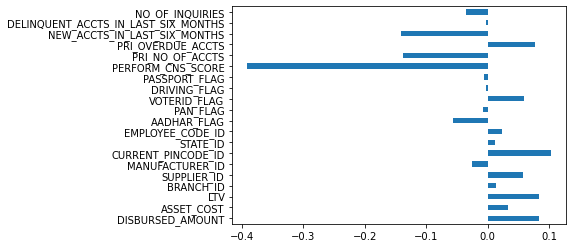

In [7]:
loan_df.corr().loc["LOAN_DEFAULT"][:-1].plot.barh()

We are also indexing this row up to, but not including, the last value. The last value is the correlation of LOAN_DEFAULT with itself, which is always 1. This throws off the scaling of the bar plot, so we are ignoring that value. We can see that the biggest correlation is the CNS score, which has a correlation of around -0.4 with loan defaults. This means that a higher CNS score is a lower chance of default, which makes sense.

In [8]:
from scipy.stats import pearsonr

from pandas.api.types import is_numeric_dtype

for col in loan_df.columns[:-1]:
    if is_numeric_dtype(loan_df[col]):
        correlation, p_value = pearsonr(loan_df[col], loan_df["LOAN_DEFAULT"])
        print(f"{col : <40} {correlation : .4f}, significant: {p_value <= 0.05}")


DISBURSED_AMOUNT                          0.0827, significant: True
ASSET_COST                                0.0322, significant: True
LTV                                       0.0834, significant: True
BRANCH_ID                                 0.0129, significant: True
SUPPLIER_ID                               0.0572, significant: True
MANUFACTURER_ID                          -0.0262, significant: True
CURRENT_PINCODE_ID                        0.1029, significant: True
STATE_ID                                  0.0115, significant: True
EMPLOYEE_CODE_ID                          0.0235, significant: True
AADHAR_FLAG                              -0.0565, significant: True
PAN_FLAG                                 -0.0083, significant: True
VOTERID_FLAG                              0.0592, significant: True
DRIVING_FLAG                             -0.0035, significant: False
PASSPORT_FLAG                            -0.0068, significant: True
PERFORM_CNS_SCORE                        -0.391

Here, we first import a few functions from scipy and pandas for the Pearson correlation and a function for checking if a column has a numeric datatype. We loop through all the columns except the last one (which is LOAN_DEFAULT) with a for loop. Then we check whether each column is numeric, and if so, we calculate the Pearson correlation. Conventionally, we set our alpha value (significance level) to 0.05, and if the p-value is smaller than this, we can say that our correlation is significantly different from 0. In the last line, we are using f-string formatting to print out the column (c), the correlation value to 4 decimal places, and True or False if the p-value is less than 0.05. We are using some features of Python string formatting here. First, we are aligning the column to the left and padding it with spaces to reach 40 characters with c : <40. Then we are specifying the correlation variable to be printed to four decimal places as a float with {correlation : .4f}. These tweaks make the printout easier to read. 

> We can also use feature-feature correlations to try and trim down our features. For example, from the pandas-profiling report, we can see that the asset cost and disbursed amount are highly correlated. We should consider keeping only one of these columns if they have a high correlation value (this could be above 0.7 or 0.9). This is especially true if two features are perfectly colinear, meaning their Pearson correlation is 1.0. Although more complex ML methods can deal with collinearity, linear and logistic regression typically cannot.

> You'll also notice that if you don't use minimal=True in the pandas-profiling report, it generates correlation plots. These plots show some other methods: phi-k and Cramer's V. Cramer's V is suitable for measuring the strength of categorical-categorical relationships, but ideally, a corrected version of Cramer's V should be used. The function and example usage for a corrected version of Cramer's V can be found here: https://stackoverflow.com/a/39266194/4549682.

In [9]:
# Dropping the insignificant columns
loan_df.drop(columns = ["DRIVING_FLAG", "DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS"], axis = 1, inplace = True)

The phi-k (also written  and here as phik) correlation calculation is a good all-around method that was created in 2018 and can be used for data containing categorical, ordinal, and interval features and targets. It can also capture non-linear relationships between data, unlike Pearson's correlation. Phik uses the chi-squared test as its foundation. The chi-squared test is useful for comparing categorical-categorical relationships, but the phik calculation groups numeric data so it can be used with chi-squared. Because of this, phik can handle any type of data, including ordinal data.

> Ordinal data is where the order of values matters but exact distances between levels are not known, such as university degree levels or a `Likert 1-5 rating scale`. Interval data is where the order and difference between values are important and known, such as the loan amount. Interval Data == Continuous Data.

To calculate phik correlations, we should make sure we have the package installed first with pip or conda (for example, conda install -c conda-forge phik). Once we import phik, we can simply use a new method of DataFrames from phik: phik_matrix(). Note that this can take a long time to run with a lot of variables, and there are implementations of phik with Spark and other big data software to speed up the calculations. Because the phik method bins interval data into groups and is performing many other calculations, it can take a long time to run even with a small number of data points on a single machine

In [10]:
# Convert datetime columns to seconds since epoch and take a sample of the data

loan_df_epoch_time = loan_df.copy()

loan_df_epoch_time["DATE_OF_BIRTH"] = (loan_df_epoch_time["DATE_OF_BIRTH"] - pd.to_datetime("1-1-1970")).dt.total_seconds()

loan_df_epoch_time["DISBURSAL_DATE"] = (loan_df_epoch_time["DISBURSAL_DATE"] - pd.to_datetime("1-1-1970")).dt.total_seconds()

sample = loan_df_epoch_time.sample(10000, random_state = 1)

> The Unix epoch (or Unix time or POSIX time or Unix timestamp) is the number of seconds that have elapsed since January 1, 1970 (midnight UTC/GMT), not counting leap seconds (in ISO 8601: 1970-01-01T00:00:00Z).

We are making a copy of the DataFrame so that we don't alter the original data, and then take the total seconds since 00:00:00 UTC on January 1st, 1970 for our two datetime columns. This is Unix time or time since the Unix epoch, which is a standard way to measure timestamps. Lastly, we sample 10k points and set a random seed (random_state) so we get the same sample every time we run the code.

In [11]:
interval_columns = ["DISBURSED_AMOUNT", "ASSET_COST", "LTV", "DATE_OF_BIRTH", "DISBURSAL_DATE", "PERFORM_CNS_SCORE", "NEW_ACCTS_IN_LAST_SIX_MONTHS", "NO_OF_INQUIRIES"]

# Calculate the PhiK Correlation Matrix
sample.phik_matrix(interval_cols=interval_columns)

C:\Users\INNO\Anaconda3\envs\practical_data_science_env\lib\site-packages\phik\data_quality.py:59: UserWarning: The number of unique values of variable CURRENT_PINCODE_ID is large: 3124. Are you sure this is not an interval variable? Analysis for pairs of variables including CURRENT_PINCODE_ID can be slow.
  warnings.warn(
C:\Users\INNO\Anaconda3\envs\practical_data_science_env\lib\site-packages\phik\data_quality.py:59: UserWarning: The number of unique values of variable EMPLOYEE_CODE_ID is large: 2637. Are you sure this is not an interval variable? Analysis for pairs of variables including EMPLOYEE_CODE_ID can be slow.
  warnings.warn(
C:\Users\INNO\Anaconda3\envs\practical_data_science_env\lib\site-packages\phik\data_quality.py:59: UserWarning: The number of unique values of variable SUPPLIER_ID is large: 1994. Are you sure this is not an interval variable? Analysis for pairs of variables including SUPPLIER_ID can be slow.
  warnings.warn(


,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,CURRENT_PINCODE_ID,DATE_OF_BIRTH,EMPLOYMENT_TYPE,DISBURSAL_DATE,...,PASSPORT_FLAG,PERFORM_CNS_SCORE,PERFORM_CNS_SCORE_DESCRIPTION,PRI_NO_OF_ACCTS,PRI_OVERDUE_ACCTS,NEW_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,LOAN_DEFAULT
DISBURSED_AMOUNT,1.000000,0.834214,0.434658,0.260666,0.921795,0.714133,0.000000,0.076036,0.032753,0.123361,...,0.022406,0.056458,0.081896,0.758983,0.000000,0.219978,0.000000,0.280268,0.000000,0.068312
ASSET_COST,0.834214,1.000000,0.234203,0.438104,0.915803,0.746936,0.503049,0.119141,0.085899,0.190759,...,0.015024,0.094075,0.081721,0.758402,0.000000,0.375882,0.186732,0.392508,0.000000,0.066889
LTV,0.434658,0.234203,1.000000,0.454097,0.696138,0.298326,0.642645,0.100507,0.143599,0.087123,...,0.000000,0.091774,0.101884,0.069078,0.034662,0.031716,0.167021,0.000000,0.040362,0.143069
BRANCH_ID,0.260666,0.438104,0.454097,1.000000,0.999973,0.545172,0.999948,0.190853,0.488737,0.239868,...,0.000000,0.260380,0.291902,0.286661,0.113925,0.202027,0.406230,0.442338,0.192342,0.229258
SUPPLIER_ID,0.921795,0.915803,0.696138,0.999973,1.000000,0.999537,0.999969,0.270253,0.554367,0.295976,...,0.000000,0.342407,0.259995,0.790454,0.351305,0.588470,0.925985,0.000000,0.000000,0.319689
MANUFACTURER_ID,0.714133,0.746936,0.298326,0.545172,0.999537,1.000000,0.711844,0.092212,0.111469,0.041266,...,0.004554,0.082095,0.112086,0.725522,0.054921,0.117437,0.044263,0.231464,0.000000,0.033447
CURRENT_PINCODE_ID,0.000000,0.503049,0.642645,0.999948,0.999969,0.711844,1.000000,0.414398,0.547061,0.142961,...,0.000000,0.339701,0.000000,0.000000,0.000000,0.241011,0.000000,0.000000,0.785574,0.292345
DATE_OF_BIRTH,0.076036,0.119141,0.100507,0.190853,0.270253,0.092212,0.414398,1.000000,0.146798,0.028882,...,0.000000,0.182808,0.227596,0.276870,0.126491,0.046282,0.347786,0.413771,0.000000,0.016474
EMPLOYMENT_TYPE,0.032753,0.085899,0.143599,0.488737,0.554367,0.111469,0.547061,0.146798,1.000000,0.079416,...,0.010496,0.050684,0.064104,0.000000,0.005256,0.000000,0.045057,0.080985,0.021320,0.510493
DISBURSAL_DATE,0.123361,0.190759,0.087123,0.239868,0.295976,0.041266,0.142961,0.028882,0.079416,1.000000,...,0.025362,0.036936,0.066148,0.025580,0.010967,0.000000,0.055161,0.000000,0.025032,0.036306


It helps to set the interval (continuous) columns, although phik will try to autodetect which are interval columns. The phik correlations span 0 to 1, with 1 being perfect correlation and 0 being no correlation. We can also get p-values from phik:

In [12]:
sample.significance_matrix(interval_cols=interval_columns)

C:\Users\INNO\Anaconda3\envs\practical_data_science_env\lib\site-packages\phik\data_quality.py:59: UserWarning: The number of unique values of variable CURRENT_PINCODE_ID is large: 3124. Are you sure this is not an interval variable? Analysis for pairs of variables including CURRENT_PINCODE_ID can be slow.
  warnings.warn(
C:\Users\INNO\Anaconda3\envs\practical_data_science_env\lib\site-packages\phik\data_quality.py:59: UserWarning: The number of unique values of variable EMPLOYEE_CODE_ID is large: 2637. Are you sure this is not an interval variable? Analysis for pairs of variables including EMPLOYEE_CODE_ID can be slow.
  warnings.warn(
C:\Users\INNO\Anaconda3\envs\practical_data_science_env\lib\site-packages\phik\data_quality.py:59: UserWarning: The number of unique values of variable SUPPLIER_ID is large: 1994. Are you sure this is not an interval variable? Analysis for pairs of variables including SUPPLIER_ID can be slow.
  warnings.warn(


,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,CURRENT_PINCODE_ID,DATE_OF_BIRTH,EMPLOYMENT_TYPE,DISBURSAL_DATE,...,PASSPORT_FLAG,PERFORM_CNS_SCORE,PERFORM_CNS_SCORE_DESCRIPTION,PRI_NO_OF_ACCTS,PRI_OVERDUE_ACCTS,NEW_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,LOAN_DEFAULT
DISBURSED_AMOUNT,116.481319,51.631737,54.613398,18.796360,21.313292,35.072438,14.083821,5.776516,2.545618,12.494446,...,0.973611,3.155755,2.879068,3.332973,0.522021,3.871224,1.559961,2.585118,2.586890,6.585216
ASSET_COST,51.631737,131.575911,28.131124,40.016730,39.360008,50.521203,24.717392,11.218756,5.412922,21.866197,...,1.082609,5.117095,3.681018,4.743038,1.307836,3.474220,2.563571,1.711003,-0.278666,3.975954
LTV,54.613398,28.131124,186.956099,37.012128,27.663300,40.511383,21.040482,5.613545,9.799225,3.950065,...,-0.268835,8.452054,6.626843,5.925326,4.220563,3.424700,5.562092,3.175410,2.759546,9.875273
BRANCH_ID,18.796360,40.016730,37.012128,244.032355,111.196262,48.750987,86.173557,7.748124,37.711246,13.232316,...,-0.665289,15.639302,15.237426,13.441245,4.216933,8.587640,9.759190,8.400799,1.460624,13.967762
SUPPLIER_ID,21.313292,39.360008,27.663300,111.196262,93.589906,100.829160,34.692137,8.859610,27.952824,11.157589,...,-0.235903,10.243795,8.447973,7.720066,4.732229,3.944604,6.666572,6.277581,1.313971,12.585204
MANUFACTURER_ID,35.072438,50.521203,40.511383,48.750987,100.829160,171.013422,28.934195,7.926705,10.197953,2.172756,...,0.395177,7.287833,5.502897,6.516572,3.419020,4.893843,3.875997,3.265796,0.047048,2.274381
CURRENT_PINCODE_ID,14.083821,24.717392,21.040482,86.173557,34.692137,28.934195,74.898970,12.890150,26.020971,12.828745,...,0.641900,12.472785,10.959018,11.236761,6.177752,4.338295,9.129994,8.664773,1.638542,13.318231
DATE_OF_BIRTH,5.776516,11.218756,5.613545,7.748124,8.859610,7.926705,12.890150,202.835094,10.044695,0.641203,...,-0.253477,20.506746,20.587162,18.703677,13.366245,4.461116,18.897265,17.744189,1.039265,0.518368
EMPLOYMENT_TYPE,2.545618,5.412922,9.799225,37.711246,27.952824,10.197953,26.020971,10.044695,115.239904,4.731995,...,0.920804,2.675800,3.770413,-0.226832,0.402876,-0.014092,1.667262,2.479317,1.124728,34.611657
DISBURSAL_DATE,12.494446,21.866197,3.950065,13.232316,11.157589,2.172756,12.828745,0.641203,4.731995,207.529470,...,0.505142,1.742135,2.616631,0.275419,0.216491,0.315604,1.096612,0.425658,0.971953,1.581190


Since it can take a long time to run on the full dataset, we can minimize runtime by only calculating correlations between the target variable and the features. First, we will convert columns to the category datatype in pandas for non-interval columns. We could also use the datatype object to represent the data as strings. The category datatype in pandas has a few extra features beyond the object datatype, although we are not using them here. Pandas' documentation explains more about the category datatype: https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html:

In [13]:
for col in loan_df_epoch_time.columns:
    if col not in interval_columns:
        loan_df_epoch_time[col] = loan_df_epoch_time[col].astype("category")
    
loan_df_epoch_time.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 133154 entries, 643538 to 476183
Data columns (total 25 columns):
 #   Column                         Non-Null Count   Dtype   
---  ------                         --------------   -----   
 0   DISBURSED_AMOUNT               133154 non-null  int64   
 1   ASSET_COST                     133154 non-null  int64   
 2   LTV                            133154 non-null  float64 
 3   BRANCH_ID                      133154 non-null  category
 4   SUPPLIER_ID                    133154 non-null  category
 5   MANUFACTURER_ID                133154 non-null  category
 6   CURRENT_PINCODE_ID             133154 non-null  category
 7   DATE_OF_BIRTH                  133154 non-null  float64 
 8   EMPLOYMENT_TYPE                128773 non-null  category
 9   DISBURSAL_DATE                 133154 non-null  float64 
 10  STATE_ID                       133154 non-null  category
 11  EMPLOYEE_CODE_ID               133154 non-null  category
 12  AADHAR_FLAG

Here, we loop through all column names and convert any non-interval columns to a category datatype. Now we can calculate the phik correlations and p-values:

In [14]:
import phik

phik_correlations = []
phik_significances = []

columns = loan_df_epoch_time.columns

y = loan_df_epoch_time["LOAN_DEFAULT"]

for col in columns:
    
    x = loan_df_epoch_time[col]
    
    if col in interval_columns:
        phik_correlations.append(phik.phik_from_array(x, y, [col]))
        phik_significances.append(phik.significance.significance_from_array(x, y, [col])[0])
    
    else:
        phik_correlations.append(phik.phik_from_array(x, y))
        #phik_significances.append("Unknown")
        phik_significances.append(phik.significance.significance_from_array(x, y)[0])
        

C:\Users\INNO\Anaconda3\envs\practical_data_science_env\lib\site-packages\phik\data_quality.py:119: UserWarning: The number of unique values of variable x is large: 2869. Are you sure this is not an interval variable? Analysis might be slow.
  warnings.warn(
C:\Users\INNO\Anaconda3\envs\practical_data_science_env\lib\site-packages\phik\data_quality.py:119: UserWarning: The number of unique values of variable x is large: 2869. Are you sure this is not an interval variable? Analysis might be slow.
  warnings.warn(
C:\Users\INNO\Anaconda3\envs\practical_data_science_env\lib\site-packages\phik\data_quality.py:119: UserWarning: The number of unique values of variable x is large: 6189. Are you sure this is not an interval variable? Analysis might be slow.
  warnings.warn(
C:\Users\INNO\Anaconda3\envs\practical_data_science_env\lib\site-packages\phik\data_quality.py:119: UserWarning: The number of unique values of variable x is large: 6189. Are you sure this is not an interval variable? Analy

The phik_from_array() function can take several arguments (see the documentation for further details: https://phik.readthedocs.io/en/latest/phik.html#phik.phik.phik_from_array), but we only need our two arrays, x and y, and a list with numeric variables that need to be binned. The phik correlation works for interval data by binning values into groups and then using another statistical test (chi-squared) to calculate the relationship between the two variables. For the interval columns, we tell the phik and significance calculation functions to bin our variable by providing the third argument, [c] (the argument is named num_vars), which is a list of numeric variables that should be binned. If we are looking at the other categorical columns, we do not bin the feature.

The phik.significance.significance_from_array() method returns a tuple of a p-value and Z-score (a statistical significance value). We will use the p-value here to check whether correlations are significant, so we only keep the first element of these returned values in our phik_significances list.

array([<AxesSubplot:title={'center':'phik_corr'}>,
       <AxesSubplot:title={'center':'p-value'}>], dtype=object)

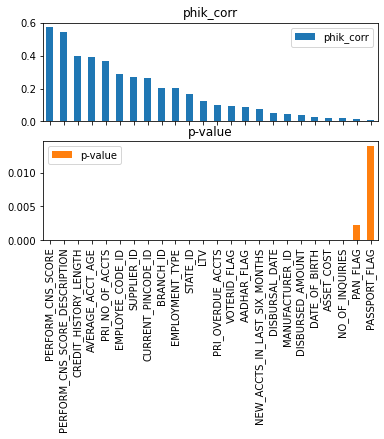

In [15]:
# Lets plot this

phik_df = pd.DataFrame({"phik_corr": phik_correlations, 
                      "p-value": phik_significances
                      }, index = columns)

# Sort the values
phik_df.sort_values(by="phik_corr", ascending=False, inplace=True)

phik_df.iloc[1:].plot.bar(subplots=True)

We first create the DataFrame from the correlations and p-values with the original column names as the index. Then we sort the correlation values from greatest to least, and finally plot the correlation and p-values in subplots.

We are indexing the DataFrame from the second row onward, since the first row is the correlation of LOAN_DEFAULT with itself (which is 1). Our result looks like this:

We can see that the first five features ordered by the phik correlation seem to have a strong correlation. Most of these are actually category datatypes, except for the CNS score (credit score). This strong correlation agrees with the Pearson correlations we saw, where the CNS score was the strongest correlation. Many of the flag features seem to have a weak correlation with the target variable, and the PAN and passport flags have non-zero p-values. However, these p-values are smaller than 0.05 (the usual alpha value), so the correlation still seems significant, although weak. If we were to use this for feature selection (we are not in this example), we might consider throwing out variables with correlations weaker than 0.1 (features starting at the voter ID flag) or correlations less than 0.2 (starting at the state ID feature).

#### Mutual Information Score and Chi-Squarred

While phik works as a general correlation measurement between any two types of variables, we can also use other methods to complement phik. Mutual information scores can be used to measure relationships between two variables of any type, although the implementations in the scikit-learn package only allow for certain comparisons:

- Categorical-categorical with sklearn.metrics mutual information methods
- Numeric-numeric, numeric-binary, and binary-binary with sklearn.feature_selection.mutual_info_classification



In [16]:
# Determining MIS between categorical-categorical columns
from sklearn.metrics import normalized_mutual_info_score

loan_df.corr(method=normalized_mutual_info_score)

C:\Users\INNO\Anaconda3\envs\practical_data_science_env\lib\site-packages\sklearn\metrics\cluster\_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received multiclass values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
C:\Users\INNO\Anaconda3\envs\practical_data_science_env\lib\site-packages\sklearn\metrics\cluster\_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received multiclass values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
C:\Users\INNO\Anaconda3\envs\practical_data_science_env\lib\site-packages\sklearn\metrics\cluster\_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
C:\Users\INNO\Anaconda3\envs\practical_data_science_env\lib\site-packages\sklearn\metrics\cluster\_supervised.py:65: UserWarning: Clustering metrics expec

,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,CURRENT_PINCODE_ID,STATE_ID,EMPLOYEE_CODE_ID,AADHAR_FLAG,PAN_FLAG,VOTERID_FLAG,PASSPORT_FLAG,PERFORM_CNS_SCORE,PRI_NO_OF_ACCTS,PRI_OVERDUE_ACCTS,NEW_ACCTS_IN_LAST_SIX_MONTHS,NO_OF_INQUIRIES,LOAN_DEFAULT
DISBURSED_AMOUNT,1.000000,0.672905,0.533719,0.253136,0.481720,0.090964,0.516901,0.157499,0.521523,0.023587,1.578066e-02,0.022188,1.590661e-03,0.214469,0.091699,0.023639,0.037129,0.027676,0.022441
ASSET_COST,0.672905,1.000000,0.716856,0.443739,0.700192,0.175233,0.693323,0.289881,0.719801,0.039380,2.599484e-02,0.037168,2.007877e-03,0.307866,0.152089,0.037202,0.061842,0.044234,0.034935
LTV,0.533719,0.716856,1.000000,0.189871,0.492414,0.056161,0.534091,0.090602,0.537294,0.008447,6.104969e-03,0.008100,1.365189e-03,0.206412,0.062717,0.014042,0.022028,0.017005,0.008049
BRANCH_ID,0.253136,0.443739,0.189871,1.000000,0.701821,0.064777,0.652846,0.755495,0.677916,0.071556,3.037022e-02,0.063769,6.593821e-04,0.053100,0.020577,0.005001,0.010744,0.008039,0.005744
SUPPLIER_ID,0.481720,0.700192,0.492414,0.701821,1.000000,0.323717,0.712319,0.517890,0.850592,0.048490,2.820681e-02,0.043372,1.264320e-03,0.169602,0.050949,0.011984,0.019655,0.016326,0.008729
MANUFACTURER_ID,0.090964,0.175233,0.056161,0.064777,0.323717,1.000000,0.085878,0.051946,0.180986,0.005493,3.193152e-03,0.005016,2.459346e-04,0.009500,0.004705,0.001268,0.002105,0.001610,0.000612
CURRENT_PINCODE_ID,0.516901,0.693323,0.534091,0.652846,0.712319,0.085878,1.000000,0.492527,0.729889,0.046726,2.320907e-02,0.042112,1.410693e-03,0.202391,0.069489,0.015738,0.026624,0.020378,0.011285
STATE_ID,0.157499,0.289881,0.090602,0.755495,0.517890,0.051946,0.492527,1.000000,0.488975,0.097543,3.884043e-02,0.086094,3.882704e-04,0.030141,0.019473,0.005389,0.011247,0.008089,0.005396
EMPLOYEE_CODE_ID,0.521523,0.719801,0.537294,0.677916,0.850592,0.180986,0.729889,0.488975,1.000000,0.047899,3.085719e-02,0.043104,1.498260e-03,0.198448,0.060079,0.013356,0.022283,0.018232,0.009203
AADHAR_FLAG,0.023587,0.039380,0.008447,0.071556,0.048490,0.005493,0.046726,0.097543,0.047899,1.000000,4.423808e-02,0.689471,1.083035e-02,0.003495,0.002965,0.000936,0.004201,0.004158,0.002909


This function returns a value between 0 and 1, where 1 is a perfect correlation and 0 is no correlation. From this, we don't see very strong relationships between the loan default target and other variables (most are closer to 0 than 1), but we do see that the PAN and passport flags have a very weak relationship (similar to what we saw with phik).

The other mutual information method in scikit-learn can be used for numeric-numeric relationships, including a binary target such as we have here:

In [17]:
from sklearn.feature_selection import mutual_info_classif

numeric_features = loan_df.select_dtypes(include=["number"]).copy()

# Drop the Response Variable
numeric_features.drop("LOAN_DEFAULT", axis = 1, inplace = True)

list(zip(numeric_features.columns, mutual_info_classif(numeric_features, loan_df["LOAN_DEFAULT"])))

[('DISBURSED_AMOUNT', 0.010270054006045859),
 ('ASSET_COST', 0.008139214038220599),
 ('LTV', 0.009121193865907262),
 ('BRANCH_ID', 0.013414435345711517),
 ('SUPPLIER_ID', 0.023855520512758854),
 ('MANUFACTURER_ID', 0.00634118659469296),
 ('CURRENT_PINCODE_ID', 0.02189338315767997),
 ('STATE_ID', 0.009168155620302043),
 ('EMPLOYEE_CODE_ID', 0.0278127148282874),
 ('AADHAR_FLAG', 0.017028806761522075),
 ('PAN_FLAG', 0.001725869776400657),
 ('VOTERID_FLAG', 0.0021830260818374025),
 ('PASSPORT_FLAG', 0.0),
 ('PERFORM_CNS_SCORE', 0.11152768964195925),
 ('PRI_NO_OF_ACCTS', 0.04500849308128041),
 ('PRI_OVERDUE_ACCTS', 0.0025085371614976815),
 ('NEW_ACCTS_IN_LAST_SIX_MONTHS', 0.018554188838465935),
 ('NO_OF_INQUIRIES', 0.0011830464366591187)]

Here, we first import the function, then select our numeric columns with the select_dtypes pandas function, and drop the target variable from our numeric features DataFrame. We then provide this DataFrame as the first argument in mutual_info_classif. The second argument should be the target column.

Lastly, we zip together the column names and mutual information scores so that they are easier to read and deal with (we need to convert them to a list so we can print them out).

There is no upper limit to the mutual information score, but the lower limit is 0. We can see the CNS score has the largest value here, which is an order of magnitude above the other values. Although we can use this mutual information method with categorical variables if we undergo some feature engineering (one-hot encoding or label encoding), it's best to use this mutual information method between numeric and binary variables only. Trying to use categorical features here would become too confusing, and we could simply use phik or a different method instead.

#### The Chi-Squarred Test

Another method we can use for some categorical-categorical relationships is the chi-squared test. Although this method (and the mutual information scores from the sklearn.metrics module) can deliver results for numeric columns, the current implementation in the scikit-learn package in Python is intended for categorical-categorical relationships. Furthermore, this chi-squared implementation is specifically intended for binary columns or frequency count columns, like word counts. We can use the chi-squared method like so:

In [18]:
from sklearn.feature_selection import chi2

chi2(loan_df[["PAN_FLAG", "STATE_ID"]], loan_df["LOAN_DEFAULT"])


(array([ 8.46807323, 48.3495596 ]), array([3.61434074e-03, 3.56624293e-12]))

The function returns two arrays; the first is chi-squared test values, and the second is p-values. We can rank the strength of relationships by the chi-squared values, where bigger means a stronger relationship. We can also check whether the relationship is statistically significant with the p-value by comparing it to a significance threshold (alpha, with the usual value of 0.05). Here, the p-values (the second array of numbers in the returned results) are very small so it looks like the relationships are significant. The stronger relationship to loan default here is with the state ID column.

#### Anova

This can be used as a complement to other methods, such as the phik test. This is useful for comparisons of numeric or binary data to a numeric or binary target variable.

In [19]:
from sklearn.feature_selection import f_classif

f_classif(loan_df[["PERFORM_CNS_SCORE", "PAN_FLAG", "STATE_ID"]], loan_df["LOAN_DEFAULT"])

(array([2.41525739e+04, 9.15861992e+00, 1.74974209e+01]),
 array([0.00000000e+00, 2.47596457e-03, 2.87881660e-05]))

First, we import the function, and then provide our features as the first argument and the target as the second argument. This results in two arrays; the F-score from the ANOVA test and the p-values:

As with most of the statistical tests we've seen, a higher F-value means a stronger relationship between the variables, and the p-value can be compared with an alpha value (usually 0.05) to check for significance. The p-values signify if the means of the features differ significantly between the different target groups, which would signify that the features may have some predictive power. Here, the p-values are all very small, so it appears the average feature values are different between the two groups of target values. For example, the average PAN flag value is statistically significantly different between the default and no-default groups according to this test.

The F-value is largest for the CNS score, signifying this is the most important of the features we looked at here, agreeing with the other methods we've seen.

### Using the Univariate Statistics for Feature Selection

- Variance Methods: Remove features based on too much or too little variance
- Pearson Correlation: Good for linear relationships between numeric and binary data
- Phi-k Correlations: Good for relationships between any category of data
- Mutual Information Score: Can be used for categorical-categorical relationships or numeric-numeric (including binary data) with `sklearn`
- Chi-squarred: Can be used for binary or frequency count variables in sklearn
- ANOVA: Can be used with a numeric or binary target column and Numeric or Binary Features


We can often start with the phik correlation, and add other methods to confirm our findings. Then we can combine them with other ML feature importance methods we will start learning about in the next chapter.

We can also simply select the k best features based on our univariate stats as a quick way to trim down our feature space. Scikit-learn has a few functions for this from the `sklearn.feature_selection` module: `SelectKBest` and `SelectPercentile`. For example, to select the top five features based on the ANOVA F-values:

In [20]:
from sklearn.feature_selection import SelectKBest

k_best = SelectKBest(f_classif, k = 5).fit_transform(loan_df_epoch_time[interval_columns], loan_df_epoch_time["LOAN_DEFAULT"])

k_best.shape

(133154, 5)

Note that we are only using the interval columns here since those are all numeric columns and this method can only handle numeric data. We first import the class, then create a new class using the ANOVA method as our scoring function (f_classif), and set k=5 to select the top five features by the largest F-values. Then we use the fit_transform() function of this class, giving it our features as the first argument and the target as the second argument. Our new array, k_best, has a shape of (133154, 5) since we only have five remaining features. We could then use this trimmed-down array as an input to an ML algorithm.

The other methods for feature selection, such as sequential and recursive feature selection, rely on ML methods. Although we can use these in the same quick way where we specify an arbitrary number of features to select (as with SelectKBest), it's better to use the performance of ML algorithms to select features based on these methods.

This concludes our section on feature selection. Remember, we can use these methods to trim down our inputs so we can reduce the chance of overfitting due to the curse of dimensionality, and our ML algorithms will run faster with less data.

## Feature Engineering


Feature engineering is creating new features based on existing features. We use this
along with data cleaning to prepare our data for ML, so our algorithms perform
better (for example, making predictions with higher accuracy).
- Combine multiple columns
- Transform numeric data
- Extract specific datetime features from a datetime column
- Bin data, where we group data into categorical bins
- One-hot encoding and label encoding (converting categotical data to numeric values)



### Data Cleaning and Preparation

- Parsing and converting string values to numeric data
- Outlier Clipping
- Converting all data to numeric data for sklearn

The last item on the list is important – we need to make sure all features and targets
are numeric before using any ML algorithms from the sklearn package. Other
packages, such as H2O, have ML algorithms that can handle categorical values and
missing values, but sklearn cannot.

#### Converting Strings to Dates

The columns that need string-to-date conversion are the AVERAGE_ACCT_AGE and
CREDIT_HISTORY_LENGTH columns. We can see these look like 0yrs 6mon, with a year
and month value.

In [21]:
import re


def convert_date_spans(date_str):
    """
    Parse date spans of the form "1yrs 1 mon"
    into the number of months as an integer
    """
    yrs, mon = re.search(r"(\d+)yrs\s+(\d+)mon", date_str).groups()
    # Cast the string to an int
    yrs, mon = int(yrs), int(mon)
    # Convert the date into months
    months = (yrs * 12) + mon
    return months

We are prototyping a regular expression here. First, we import Python's built-in
re module. Then we use the search() function, which takes a few arguments, the
pattern, and then the string we will search. It returns a re match object, which has
several methods available. If there is no match, the function returns None. Here, there
is a match, so we use the groups() function to get the returned matching groups (if
there is no match, this would return an error).
The regular expression here is composed of the following parts. The r in front of
the string signifies a raw string, meaning all characters are interpreted literally. This
means the backslash is treated as a backslash and not an escape character.

The \d sequence matches a digit (0-9). The + after \d means it will match one or more
digits in a row. The parentheses around the \d+ bits mean it treats these sections
as subgroups. The groups() function returns a tuple of the subgroups, so here, it
returns ('1', '11') from '1yrs 11mon'. The main "group" is the entire match, which
we can retrieve with group(0). After the first digit subgroup (the (\d+) part), we
then look for the yrs string. Then we search for \s+, which is one or more spaces.
Finally, we have one subgroup to get the number of months, and then match the last
part of the string, mon.

Then, we use the same regular expression we tested, and return the two parts of the
tuple to the variables yrs and mon. Then we convert these to integers and add them
together to get the total number of months. One small improvement to this function
would be error handling – we could first get the result of the re.search() method
and check that it's not None before getting the groups. If it was None, we could return
0 or another value, such as -1, to signify the data is missing.

In [22]:
import swifter


loan_df["AVERAGE_ACCT_AGE_MONTHS"] = loan_df.swifter.apply(lambda x: convert_date_spans(x["AVERAGE_ACCT_AGE"]), axis = 1)


loan_df["CREDIT_HISTORY_LENGTH_MONTHS"] = loan_df.swifter.apply(lambda x: convert_date_spans(x["CREDIT_HISTORY_LENGTH"]), axis = 1)


# Drop the AVERAGE_ACCT_AGE and CREDIT_HISTORY_LENGTH
loan_df.drop(["AVERAGE_ACCT_AGE", "AVERAGE_ACCT_AGE"], axis=1, inplace=True)

Pandas Apply:   0%|          | 0/133154 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/133154 [00:00<?, ?it/s]

#### Outlier Cleaning Strategies

Many times, data will have outliers. Sometimes, the outliers are obvious errors, such
as when someone's age is well over 100 years in a dataset. Other times, we can use
statistical outlier detection methods. Once we have the outliers detected, we
can "clip" these values to the maximum and minimum values we might expect. The
values for clipping might be the IQR (inter-quartile range) outlier boundaries or a
percentile of the data (like the 5th percentile for the minimum, and the 95th percentile
for the maximum). We could also use a simple filter where any value above a
threshold is clipped to the maximum value below the threshold. Lastly, we could
use a statistical test for outliers like the GESD from the scikit-posthocs package. Most of these methods (IQR, GESD, and
percentiles) depend on our data being close to a normal distribution. If our data is
not a normal distribution, we should consider using a hand-picked threshold for
outliers.


To decide if we want to clip outliers, it can be helpful to look at histograms and box
plots of the data. We can see whether there are many outliers or if the distribution
looks like it is very spread out. If there are only a few outliers (around 1% of the
data), we could deal with them by clipping the values. If there are many outliers,
it may be a part of the natural distribution for the data, and we may not want to
alter it. We should also use common sense when clipping outliers. For example, for
something like someone's age, we probably don't need to clip outliers on the low
end, but may need to deal with outliers on the high end.

<AxesSubplot:>

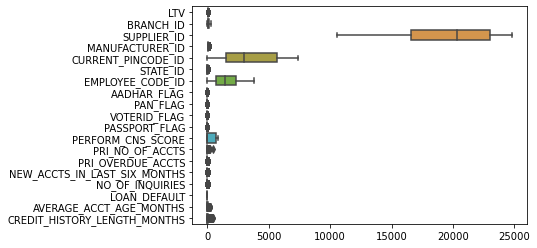

In [23]:
import seaborn as sns

sns.boxplot(data=loan_df.drop(["DISBURSED_AMOUNT", "ASSET_COST"], axis = 1), orient="h")

<AxesSubplot:>

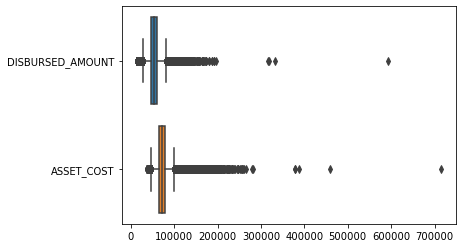

In [24]:
sns.boxplot(data=loan_df[["DISBURSED_AMOUNT", "ASSET_COST"]], orient="h")

<AxesSubplot:ylabel='Frequency'>

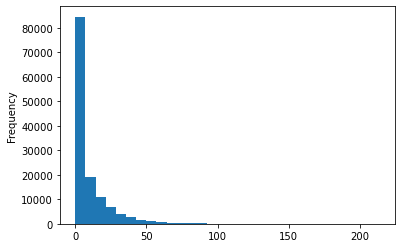

In [25]:
loan_df["AVERAGE_ACCT_AGE_MONTHS"].plot.hist(bins=30)

From this, we can see that the account age is highly skewed and more like an
exponential distribution. The disbursed amount looks to be more normal with some
very large outliers on the high side:

<AxesSubplot:ylabel='Frequency'>

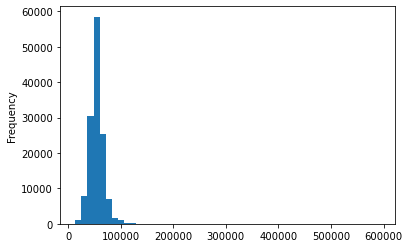

In [26]:
loan_df["DISBURSED_AMOUNT"].plot.hist(bins=50)

>Detecting outliers using the IQR method for DISBURSED_AMOUNT

In [27]:
import numpy as np


q3 = loan_df["DISBURSED_AMOUNT"].quantile(0.75)

q1 = loan_df["DISBURSED_AMOUNT"].quantile(0.25)

iqr = (q3 - q1)

# Get the indices of the outliers
outliers = np.where(loan_df["DISBURSED_AMOUNT"] > (q3 + 1.5 * iqr))[0]

print(q3 + 1.5 * iqr)

80400.0


First, we get the Q3 and Q1 quartiles (the 75th percentile and 25th percentile of the
data), and then calculate the interquartile range as the difference between these two.
We use NumPy's where() function to return the indices where the disbursed amount
is above 1.5 times the IQR plus the Q3 quartile. The where() function returns a tuple,
so we index the first element of the tuple to get the indices of the outliers. When we
print the outlier boundary, it is around 80,000, which seems to line up well on the
histogram.
We can examine these outliers with loan_df['DISBURSED_AMOUNT'][outliers]. To
clip these to our outlier boundary, we can use a pandas function:

In [28]:
# Examine Outliers

loan_df["DISBURSED_AMOUNT"].clip(upper = q3 + 1.5 * (iqr), inplace = True)

We provide an upper argument to clip() to tell it where to clip the maximum values
(we can also use the lower argument to clip values below a threshold). This will
change our large outliers to this upper value. If we set the argument inplace=True,
we will update the data in the underlying DataFrame. We can see that our outliers
have been changed to the upper boundary with loan_df['DISBURSED_AMOUNT']
[outliers] after clipping the data.

This clipping to maximum values works, but another way of dealing with outliers is to impute these values as we do with missing values. If someone's age is far too high in our dataset and it looks like a data entry or other spontaneous error, we could impute it using the mean, median, or KNN imputation.

Although we only demonstrated cleaning one column here, it would be ideal to
use a boxplot or histogram to examine all the data and deal with any problematic
columns. It would also be best to clean our data then start on our
feature engineering. However, it's not a bad idea to come back and check for outliers
again after performing feature engineering too.

#### Combining Multiple Columns

In our data here,
we can create the customer's age at the time of the loan by combining the DISBURSAL_
DATE and DATE_OF_BIRTH columns:

In [29]:
# Age of the Customer
loan_df["AGE"] = (loan_df["DISBURSAL_DATE"] - loan_df["DATE_OF_BIRTH"]) // 365

We are taking the difference between the dates here and dividing by the number of
days in a year. The difference in dates is calculated as days by default for pandas. We
can also specify days (or another unit of measure) like so:

We are taking the difference between the dates here and dividing by the number of
days in a year. The difference in dates is calculated as days by default for pandas. We
can also specify days (or another unit of measure) like so:

In [30]:
(loan_df["DISBURSAL_DATE"] - loan_df["DATE_OF_BIRTH"]).dt.days

UNIQUEID
643538    13463
595627    15634
586518     9702
491581     7917
614684    14124
          ...  
627837    14085
444591     8144
598150    10521
474968    12152
476183    16312
Length: 133154, dtype: int64

The dt accessor provides datetime functionality and properties to us, including days
and seconds. However, this doesn't take into account leap years (although we could
divide by 365.25 to try and account for that). A slightly more accurate solution is to
use the actual time delta between the dates:

In [31]:
from dateutil import relativedelta


def calculate_age_in_years(x):
    """
    This function expects the loan dataframe
    then computes the age using the DISBURSAL_DATE and DATE_OF_BIRTH
    """
    return relativedelta.relativedelta(x["DISBURSAL_DATE"], x["DATE_OF_BIRTH"]).years


loan_df["AGE"] = loan_df.swifter.apply(lambda x: calculate_age_in_years(x), axis = 1)

Pandas Apply:   0%|          | 0/133154 [00:00<?, ?it/s]

We first import the relativedelta module from the built-in dateutil library. Then
we define a function that will get the difference in years between the disbursal and
birth dates, which takes a single argument we've simply called x. Finally, we use
swifter with apply to run the calculations over the entire DataFrame. Now we can
generate some EDA plots and stats of the new column. For example, we could plot
a histogram with loan_df['AGE'].plot.hist(bins=50) as shown below. Again, it is
useful to check this new column for outliers:

<AxesSubplot:ylabel='Frequency'>

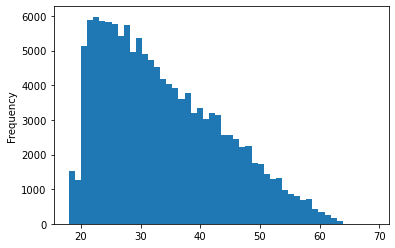

In [32]:
loan_df['AGE'].plot.hist(bins=50)

#### Transforming Numeric Data

Another way to engineer features is to pass numeric data through functions to
change its values. Some ML algorithms work better on data that is closer to a normal
distribution, and others work better when the data has been scaled in particular
ways, which can improve performance. These transformations could be any
mathematical operation, but we'll look at three useful methods here: standardization,
the Yeo-Johnson transformation, and log scaling.

##### Standardization

Standardization divides each data point by the standard deviation and subtracts
the mean. This ensures that the mean is 0 and the standard deviation is 1. This
can be useful for certain algorithms such as neural networks to perform optimally
(for example, a similar scaling of images for classification problems can improve
performance). We can also use standardization (or other similar normalizations,
like min-max normalization) to preprocess data for clustering. Any algorithm that uses distance
calculations, such as `clustering, k-nearest neighbors, or support vector machines
, Support Vector Machine (SVM) Machine Learning Models)`, benefits from standardization or feature normalization. We can easily carry this out with the StandardScaler class from sklearn:

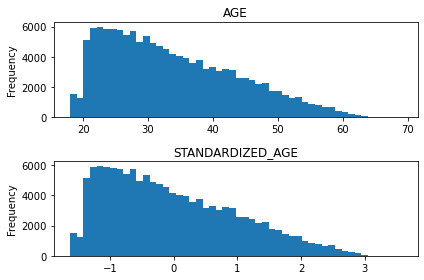

In [33]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

scaler = StandardScaler()

loan_df["STANDARDIZED_AGE"] = scaler.fit_transform(loan_df["AGE"].values.reshape(-1, 1))

f, ax = plt.subplots(2, 1)

loan_df["AGE"].plot.hist(ax=ax[0], title = "AGE", bins = 50)

loan_df["STANDARDIZED_AGE"].plot.hist(ax=ax[1], title = "STANDARDIZED_AGE", bins = 50)

plt.tight_layout()

We first import the class and then create a new StandardScaler class. We use this
new class to fit to the AGE data, and then transform it (standardizing it). To give
data to this function, it needs to have two dimensions, and it will standardize each
column if we have more than one. If we only provide a single column, it needs to
have the shape (rows, 1). We can make our data have this shape by first getting
the values as a NumPy array with .values, and then using the reshape() method
of arrays to add another axis, making it so that we have a single column. The -1 in
reshape uses the existing dimension, so it reshapes it into
(loan_df['AGE'].shape[0], 1).

#### Making data more Gaussian with the Yeo-Johnson transform

For some ML algorithms such as linear discriminant analysis (LDA), there
is an assumption that the distribution of the data or targets is Gaussian. For
example, linear and logistic regression assume this for continuous data used in
those algorithms. We can also get small boosts in performance for distance-based
algorithms, such as `clustering, k-nearest neighbors, and SVMs`. Although we can
manually try different transforms, like squaring our data, taking the square root or
logarithm, and so on, it's easier to let an algorithm do the work for us. We can easily
transform data to a more Gaussian form with sklearn:

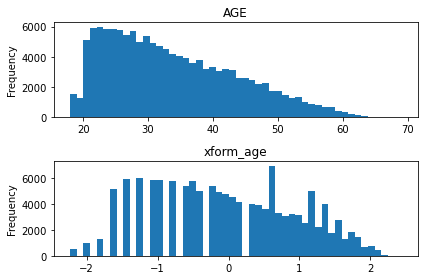

In [35]:
from sklearn.preprocessing import PowerTransformer


pt = PowerTransformer()

loan_df["xform_age"] = pt.fit_transform(loan_df["AGE"].values.reshape(-1, 1))


f, ax = plt.subplots(2, 1)

loan_df["AGE"].plot.hist(ax=ax[0], title="AGE", bins=50)

loan_df["xform_age"].plot.hist(ax=ax[1], title="xform_age", bins=50)

plt.tight_layout()

We can see that this is very similar to StandardScaler. We first import the class and
then create a new PowerTransformer class instance. Then we fit it to the AGE data
and transform it. Again, we need to reshape our data to have a single column for
the transformer. This transformation fits a parameter, lambda, which controls the
transformation of the data. This lambda value can be any real number (essentially
any number from negative infinity to positive infinity) and produces different
transforms of the data. Using some complex math, it optimizes this lambda
parameter so that the data most closely resembles a normal distribution.


We can see that our transformed distribution is a little closer to a normal distribution,
although it's not perfect. The PowerTransformer() class, by default, uses the Yeo-
Johnson transform and standardizes our data. We can change these settings if we
want with arguments when we initialize the class. The other option for transforming
is the Box-Cox transformation by setting the method='box-cox' argument. The
problem with Box-Cox is that it only works with positive input values, whereas Yeo-
Johnson can work with negative values. We can also turn off standardization with
the standardize=False argument, although if we are already transforming the data
with Yeo-Johnson, we might as well have the transformer standardize the data too.

#### Extracting datetime features


In [38]:
# Extract seconds from dates
(loan_df["DISBURSAL_DATE"] - loan_df["DATE_OF_BIRTH"]).dt.days

UNIQUEID
643538    13463
595627    15634
586518     9702
491581     7917
614684    14124
          ...  
627837    14085
444591     8144
598150    10521
474968    12152
476183    16312
Length: 133154, dtype: int64

In [39]:
# Extract day of the week
loan_df["DISBURSAL_DATE"].dt.dayofweek

UNIQUEID
643538    1
595627    6
586518    3
491581    2
614684    2
         ..
627837    4
444591    4
598150    0
474968    2
476183    3
Name: DISBURSAL_DATE, Length: 133154, dtype: int64

This returns integers, with 0 representing Monday, and 6 for Sunday. Again, we
use the dt datetime accessor with our pandas series, and then provide the datetime
property we want to access. Among the other properties we can extract are the
following:
- year
- month
- day
- hour
- minute
- second
- microsecond
- nanosecond
- dayofyear
- quarter

#### Binning

As we learned, a larger dimension of features can be problematic (the curse of
dimensionality). One way to reduce the size of our feature space is to bin numeric
data. Instead of having a large numeric range, we can group values into bins.

In [42]:
from sklearn.preprocessing import KBinsDiscretizer


kbd = KBinsDiscretizer(n_bins=10, encode="ordinal")

loan_df["binned_disbursed_amount"] = kbd.fit_transform(loan_df["DISBURSED_AMOUNT"].values.reshape(-1, 1)).astype("int")

Here, we import the binning class from the sklearn.preprocessing module. Then we
initialize a new class in the kbd variable. We choose to use 10 bins and will encode
the output as values from 0 to 9.This ordinal encoding returns a number for the bins, with
the smallest number corresponding to the bin with the smallest values, and the
largest number (9, here) corresponding to the largest values, and this is returned as a
single feature. As with other preprocessors, we use the fit_transform() method and
need to reshape our data to be 2D. We also convert the datatype to an integer, since
it returns a float. Float datatypes take up a little extra memory, so this is a minor
optimization.

The default method to break up data into bins is to use quantiles, set by the
argument strategy='quantile' in the KBinsDiscretizer class initialization. This
means the data is split into equal fractions by counts of data points from the least
to the greatest. There are a few other options (uniform and kmeans), but quantile is
often going to be the best choice.
This ordinal encoding method gives us only one new feature that we can use to
replace our continuous values with. If we use one-hot encoding, we will end up
with a new feature or column for each unique bin. This would defeat the purpose
of reducing dimensionality, although for a small number of bins, it can work.

In [45]:
loan_df[["binned_disbursed_amount", "DISBURSED_AMOUNT"]]

,binned_disbursed_amount,DISBURSED_AMOUNT
UNIQUEID,,
643538,2,48349.0
595627,5,55159.0
586518,8,67882.0
491581,5,55613.0
614684,2,46249.0
...,...,...
627837,8,63213.0
444591,2,48549.0
598150,8,62613.0


#### One-hot encoding and label encoding

Let's first look at label encoding. This is where we transform categorical values into
numbers. The simplest example is mapping a binary variable onto the numbers 0
and 1. We can see from our EDA that the EMPLOYMENT_TYPE feature is only "Salaried,"
"Self employed," and missing values. We'll fill the missing values with the mode (Self
employed), and then convert these to a 1 for "Self employed" and 0 for "Salaried":

In [51]:
loan_df["EMPLOYMENT_TYPE"].value_counts()

Self employed    72787
Salaried         55986
Name: EMPLOYMENT_TYPE, dtype: int64

In [52]:
loan_df["EMPLOYMENT_TYPE"].fillna("Self employed", inplace=True)

loan_df["EMPLOYMENT_TYPE"] = loan_df["EMPLOYMENT_TYPE"].map(lambda x: 1 if x == "Self employed" else 0)

loan_df["EMPLOYMENT_TYPE"] = loan_df["EMPLOYMENT_TYPE"].astype("int")

The first line simply fills in missing values with the mode (the most common value).
Then we use the map() function of pandas series and DataFrames with a lambda
function to return 1 if the EMPLOYMENT_TYPE is "Self employed" and 0 otherwise.
Finally, we convert this column to an integer datatype since it is still an object
datatype that takes up much more memory (and will be treated differently by ML
algorithms). By checking the unique values before and after conversion with loan_
df['EMPLOYMENT_TYPE'].unique(), we can see that we've converted from strings to
integers.

When we have more than two unique values, we can instead assign a number for
each value. Again, sklearn has a convenient class for this:

In [54]:
loan_df["BRANCH_ID"].value_counts()

2      7436
67     6469
5      5294
3      5267
36     5092
       ... 
261     109
217     106
84       79
111      46
158      33
Name: BRANCH_ID, Length: 82, dtype: int64

In [56]:
from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()

loan_df["le_branch_id"] = le.fit_transform(loan_df["BRANCH_ID"])

loan_df["le_branch_id"].value_counts()

1     7436
30    6469
3     5294
2     5267
20    5092
      ... 
81     109
70     106
42      79
50      46
63      33
Name: le_branch_id, Length: 82, dtype: int64

Like other preprocessors, we import it and create a new instance of the class. We
then use the fit_transform method, which assigns a unique integer for each unique
item or category in our data. Notice that we don't need to reshape the data here. This
returns a NumPy array that looks like this:

#### Simplifying Categorical Columns

When we have several values for a categorical column, we can reduce the feature
space size by grouping the minority values into an "other" column. For example, let's
take a look at the top categories for the MANUFACTURER_ID feature and decide which to
keep, and which to put in the "other" category

([<matplotlib.axis.XTick at 0x1d4989fd700>,
 [Text(0, 0, '86'),
  Text(1, 0, '45'),
  Text(2, 0, '51'),
  Text(3, 0, '48'),
  Text(4, 0, '49'),
  Text(5, 0, '120'),
  Text(6, 0, '67'),
  Text(7, 0, '145'),
  Text(8, 0, '153'),
  Text(9, 0, '152')])

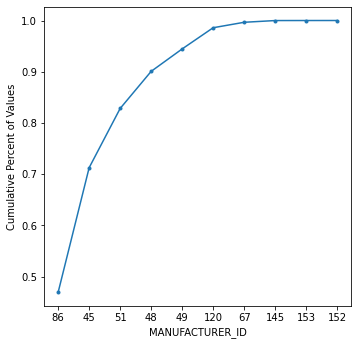

In [61]:
(loan_df["MANUFACTURER_ID"].value_counts().cumsum() / loan_df.shape[0]).reset_index(drop = True).plot(marker=".", figsize=(5.5, 5.5))


plt.xlabel("MANUFACTURER_ID")

plt.ylabel("Cumulative Percent of Values")

plt.xticks(range(loan_df["MANUFACTURER_ID"].unique().shape[0]), loan_df['MANUFACTURER_ID'].value_counts().index)

We are combining several commands in the first line. We first get the value counts,
and then take the cumulative sum of them. Then we divide this by the number of
rows to get the cumulative percentage of the data for each unique value. We then
reset the index so that the plotting will work properly (otherwise the index values
are the actual IDs), and drop the ID index column resulting from this with drop=True.
Finally, we plot it and display points with the marker='.' argument.

With a plot like this, we are looking for an "elbow," where the increase in cumulative
percent starts to flatten out. We can see at the fourth unique ID with the most value
counts (48), we have captured 90% of the values and the slope of the line begins to
decrease. We also see at the ID of 120 that we are near 99% of all values and the slope
decreases drastically. This ID==120 elbow is the better choice for a flattening of the
slope, although the more categories we keep, the bigger our feature space will be. We
will choose ID==120 as our elbow in the plot and put the other IDs into the "other"
category.

In [63]:
# filter by excluding the top categories

loan_df.loc[~loan_df["MANUFACTURER_ID"].isin([86, 45, 51, 48, 49, 120]), "MANUFACTURER_ID"] = "other"


We use the tilde character (~) at the beginning of the filter clause in our .loc[]
indexer to negate the condition. So, this line will filter the MANUFACTURER_ID column
of loan_df where the values are not in the list provided.

In [ ]:
# choose the IDs we want to set to other

loan_df.loc[(loan_df["MANUFACTURER_ID"].isin([67, 145, 153, 152])), "MANUFACTURER_ID" ] = "other"

Both achieve the same outcome. The loc indexer allows us to select rows by filtering
for those rows where the manufacturer ID is in the top four we identified by value
counts. Then we select MANUFACTURER_ID as the column in loc[]. This allows us to set
these values to a new value, which we provide as 'other'.

Although we could have one-hot encoded our manufacturer IDs without doing this
step, this will help to keep our dimensions smaller. Next, we will look at how to onehot
encode our manufacturer IDs.

#### One-hot Encoding

One-hot encoding takes a categorical variable and creates a new column for each
unique value. Each new column is composed of binary values (1s or 0s), signifying
whether that row has that categorical value. For example, our first row has 51 for the
manufacturer ID, so we could create a one-hot encoding column called manu_ID=51.
This column would be 1 for the first row. Other manufacturer ID one-hot-encoded
columns, such as manu_ID=45, would be 0. Although there is a one-hot-encoder class
in `sklearn.preprocessing`, the pandas function `get_dummies()` is much easier to use.
One-hot encoded variables are also called dummy variables, which is where the
name for the function comes from.

In [64]:
manufacture_ohe = pd.get_dummies(
    loan_df["MANUFACTURER_ID"],
    prefix = "MANU_ID",
    prefix_sep = "="
).drop(["MANU_ID=other"], axis=1)

We provide the data we want to dummy or one-hot encode as the first argument and
provide a prefix and separator between the prefix and the category labels (prefix_
sep) to use for column names. This results in patterns for column names such as
MANU_ID=45 here. Lastly, we drop the other column. If all the other one-hot-encoded
columns are 0, we can infer it is the other category. We could drop one of the onehot-
encoded columns for this reason.

However, sometimes it can be helpful to keep all one-hot-encoded variables so that
we can get information from ML algorithms about each one. The manufacturer_ohe
DataFrame we have now looks like this:

In [65]:
manufacture_ohe

,MANU_ID=45,MANU_ID=48,MANU_ID=49,MANU_ID=51,MANU_ID=86,MANU_ID=120
UNIQUEID,,,,,,
643538,0,0,0,1,0,0
595627,1,0,0,0,0,0
586518,0,0,0,1,0,0
491581,0,0,0,0,1,0
614684,1,0,0,0,0,0
...,...,...,...,...,...,...
627837,1,0,0,0,0,0
444591,0,0,1,0,0,0
598150,0,0,0,1,0,0


> We can see it's simply a set of binary values for our unique manufacturer IDs. We
can then combine it with our original data like so:

In [67]:
loan_df_ohe = pd.concat([loan_df, manufacture_ohe], axis = 1)

In [68]:
loan_df_ohe.head()

,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,CURRENT_PINCODE_ID,DATE_OF_BIRTH,EMPLOYMENT_TYPE,DISBURSAL_DATE,...,STANDARDIZED_AGE,xform_age,binned_disbursed_amount,le_branch_id,MANU_ID=45,MANU_ID=48,MANU_ID=49,MANU_ID=51,MANU_ID=86,MANU_ID=120
UNIQUEID,,,,,,,,,,,,,,,,,,,,,
643538,48349.0,65210,76.68,3,16092,51,51,1981-12-20,0,2018-10-30,...,0.209982,0.385687,2,2,0,0,0,1,0,0
595627,55159.0,62972,88.93,72,16682,45,475,1976-01-01,1,2018-10-21,...,0.821096,0.905238,5,34,1,0,0,0,0,0
586518,67882.0,113530,61.66,7,23091,51,5858,1992-03-26,1,2018-10-18,...,-0.808542,-0.785029,8,4,0,0,0,1,0,0
491581,55613.0,69807,85.95,103,20285,86,6995,1997-01-01,1,2018-09-05,...,-1.317804,-1.609313,5,47,0,0,0,0,1,0
614684,46249.0,67645,70.22,67,18129,45,1511,1980-02-22,0,2018-10-24,...,0.413686,0.570433,2,30,1,0,0,0,0,0


We can use one-hot encoding to prepare categorical data so that it can be used in
sklearn. However, we should be cautious to not increase our feature size too much
(recall the curse of dimensionality). One-hot encoding is a useful tool, but be careful
not to overuse it.

### Dimensionality Reduction

Another way to combat
the curse of dimensionality is to reduce the size of our dimensions with mathematical
techniques.
- Principle Component Analysis
- Singular Value Decomposition
- Independent Component Analysis
- Non-Negative Matrix Factorization (NMF)
- t-SNE and UMAP (better for non-linear structures, like natural language and
images)
- Autoencoders (a neural network technique that ends up being similar to
PCA)


#### Principle Component Analysis

PCA is a common and easy-to-use dimension reduction technique. It finds dimensions among our feature space that capture the most variance and breaks our data up into those components. The components are made of linear combinations of our features, so it's easy to apply the transformation to new data or to take the inverse transform of PCA-transformed data. Some people consider PCA to be an unsupervised learning technique, but it is often used for dimensionality reduction. 

In [70]:
from sklearn.decomposition import PCA

ss = StandardScaler()

scaled = ss.fit_transform(loan_df_epoch_time[interval_columns])

pca = PCA(random_state=42)

loan_pca = pca.fit_transform(scaled)

The dimensionality reduction classes and techniques are found in the sklearn.decomposition module. Before we use PCA, we should usually standardize our data to have mean 0 and variance 1 (unit variance) as we did here with StandardScaler. This should be done when we have features that are in different units, such as here where we have costs, datetimes (in seconds), credit scores, and more. If we have data where all the features are in the same units, we might leave the data as is.

Once we have our data standardized, we first initialize a new instance of the class, setting the random_state argument. When this random_state argument is available in functions, it's a good idea to set it for reproducible results. Then we use the fit_transform method we've seen before, providing it with a NumPy array of data (which is how pandas stores its data).

This function can only take numeric data, so we select our scaled interval (continuous) columns from earlier in the chapter from our DataFrame where the datetimes have been converted to seconds since the epoch. From this, we can then plot the explained variance ratio and feature importance for the most important PCA component:

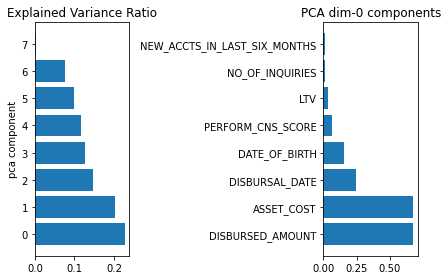

In [73]:
idx = pca.explained_variance_ratio_.argsort()[::-1]
ticks = range(pca.n_components_)
f, ax = plt.subplots(1, 2)
ax[0].barh(ticks, pca.explained_variance_ratio_[idx])
ax[0].set_title("Explained Variance Ratio")
ax[0].set_ylabel("pca component")
ax[0].set_yticks(ticks)
comp_idx = abs(pca.components_[0]).argsort()[::-1]
ax[1].barh(ticks, abs(pca.components_[0, comp_idx]))
plt.yticks(ticks, np.array(interval_columns)[comp_idx])
ax[1].set_title("PCA dim-0 components")
plt.tight_layout()

The first line uses NumPy's array argsort method to get the indices of the sorted array (from least to greatest). We reverse this so that we have the indices from greatest to least with indexing: [::-1].

Then we create our plot using plt.subplots. The first two arguments are the number of rows and columns for our subplots. It returns the figure object, which we store in f, and the axes objects, stored in ax. We can then get the first row's subplot with ax[0]. We create the bar plot of explained variance ratios using our greatest-to-least sorted index variable, idx. We can index NumPy arrays with a list of values or an array like this (but not Python lists). Then we set the title and x axis label for better readability.

Next, we get the absolute value (with the built-in abs() function) of the coefficients for each of the features for the first PCA dimension. This is the PCA dimension that explains the biggest amount of variance in the data, so it is the most important to examine first. We again use argsort and reverse this with [::-1] indexing. This gives us the index values for the first PCA component's feature importances, sorted from greatest to least. We then use that to index the components_ property of our pca object for our bar plot on the second subplot (which is on the second, or bottom, row), ax[1].

Next, we set the x-axis tick labels with plt.xticks so that the labels will be the feature names. This xticks function takes the tick locations as the first argument and the new labels as the second argument. We convert our interval_columns list to a NumPy array so we can index it with our sorted index, comp_idx.

Then we also rotate the labels by 90 degrees so that they are readable. Finally, we set the title for this second subplot and use tight_layout() to make sure all the figure components are visible and not overlapping. Our result looks like this:

From this, we can see the first PCA dimension makes up a little over 20% of the variance in the data, closely followed by the second PCA dimension with around 20% explained variance. We see that this first PCA dimension is mainly composed of the disbursed amount and asset cost. Looking back at our initial EDA, we can see that these two columns are actually strongly correlated. As mentioned earlier, we may only want to keep one of these columns since they are strongly correlated. Beyond these first two important features, we see that the rest of the features have much smaller coefficients, meaning they are less important in this first PCA dimension.

> Once we have our transformed PCA data (loan_pca), we can access the PCA components with the column indexer. For example, if we wanted to select only the first two PCA components, we would use loan_pca[:, :2].

This selects all rows with the first colon, and then selects the first column up to the second column (an index of 1) with :2. We can use PCA to reduce our dimension size, but choosing the number of PCA dimensions to keep depends on your application. For ML, we can try increasing numbers of PCA dimensions and see how it affects the performance of our algorithms (for example, we could examine the accuracy of predictions from an ML algorithm). Once our accuracy reaches a plateau, we might stop adding PCA dimensions. There are other methods for determining the number of important PCA components, which are heuristics and should not be blindly relied upon. Many of these are described in a paper by Cangelosi and Goriely here:` https://biologydirect.biomedcentral.com/articles/10.1186/1745-6150-2-2`. In our case above, the only PCA component we might not use would be the last one, since the explained variance is very low. So, we could reduce our dimensionality by one.